In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 출력한 내용 청소
from IPython.display import clear_output

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 다중선형회귀
- 학습 데이터의 컬럼이 하나가 아니라 다수가 존재할 수 있다.
- 이 때문에 최소 제곱법을 사용하는 것이 아닌 경사 하강법을 이용하여 기울기와 절편을 찾게 된다.
- 컬럼의 개수 만큼 기울기를 구해야 한다.
- 머신러닝에서는 기울기를 가중치로, 절편은 바이어스 라는 용어로 부른다.
- 만약 컬럼이 1개라면
- y = ax + b
- 만약 컬럼이 2개라면
- y = a1x1 + a2x2 + b

In [23]:
# 학습할 데이터
공부한시간 = [2, 4, 6, 8]
과외횟수 = [0, 4, 2, 3]
성적 = [81, 93, 91, 97]

In [24]:
# 계산을 용이하게 하기 위해 ndarray를 생성한다.
x1_data = np.array(공부한시간)
x2_data = np.array(과외횟수)
y_data = np.array(성적)

In [25]:
# 가중치
a1 = 0
a2 = 0
# 바이어스
b = 0

In [26]:
# 학습률
lr = 0.001

In [27]:
# 학습 횟수
epochs = 50000

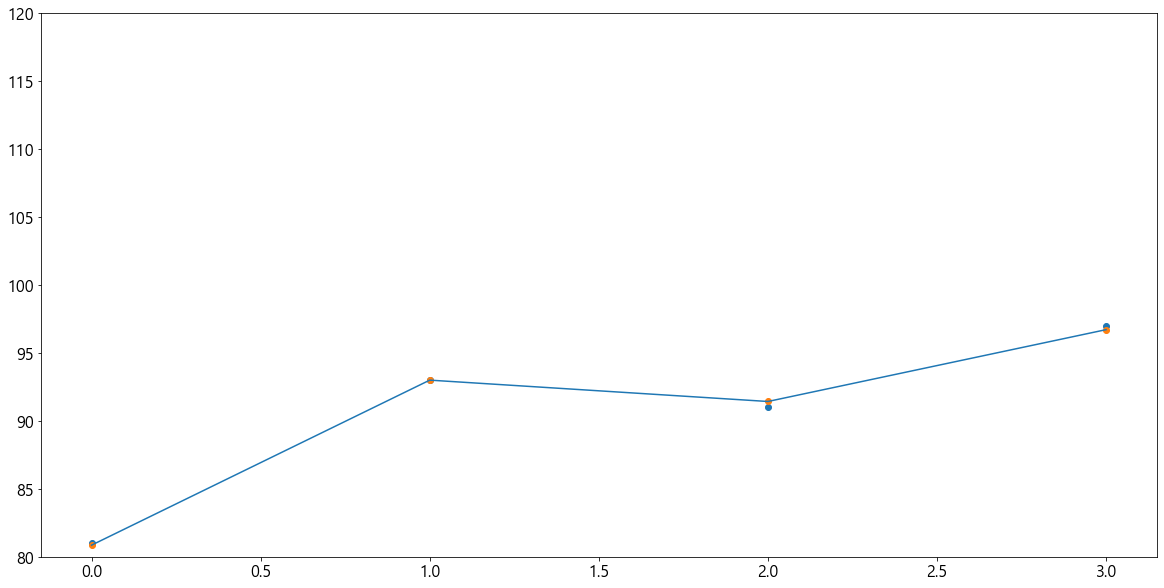

In [28]:
# 학습한다.
# 학습 횟수 만큼 반복한다.
for i in range(epochs):
    # 현재의 기울기와 절편을 이용해 예측 결과를 가져온다.
    y_pred = (a1 * x1_data) + (a2 * x2_data) + b
    # print(y_pred)
    
    # 오차를 구한다
    error = y_data - y_pred
    # print(error)
    
    # 가중치값을 미분한다.
    a1_diff = -(2 / len(x1_data)) * sum(x1_data * error)
    a2_diff = -(2 / len(x2_data)) * sum(x2_data * error)
    #바이어스를 미분한다.
    b_diff = -(2 / len(x1_data)) * sum(error)
    # print(a1_diff, a2_diff, b_diff)
    
    # 가중치와 바이어스를 업데이트 한다.
    a1 = a1 - (lr * a1_diff)
    a2 = a2 - (lr * a2_diff)
    b = b - (lr * b_diff)
    # print(a1, a2, b)
    
    if i % 100 == 0 :
        clear_output(wait=True)
        
        # print(f'epoch : {i}, 기울기1 : {a1}, 기울기2 : {a2}, 바이어스 : {b}')
        
        
        # x축 데이터
        temp = list(range(len(공부한시간)))
        
        plt.scatter(temp, 성적, label='원본')
        plt.scatter(temp, y_pred, label='예측')
        plt.plot(temp, y_pred)
        plt.ylim(80, 120)
        plt.show()

In [21]:
# 결과를 예측한다.
y_pred = (a1 * x1_data) + (a2 * x2_data) + b
y_pred

array([80.85713595, 92.99999789, 91.42857118, 96.7142888 ])

In [22]:
성적

[81, 93, 91, 97]